In [1]:
"""
 author:jjk
 datetime:2020/02/05
 coding:utf-8
 project name:test/pandas
 Program function: 

"""
import pandas as pd
import numpy as np
%matplotlib inline


In [2]:
'''
1.经过统计得到多维度指标数据
  非常场景的统计场景，指定多个维度，计算聚合后的指标
  实例：统计得到电影评分数据集”，每个月份的每个分数被评分多少次：（月份、分数1~5、次数）

'''

'\n1.经过统计得到多维度指标数据\n  非常场景的统计场景，指定多个维度，计算聚合后的指标\n  实例：统计得到电影评分数据集”，每个月份的每个分数被评分多少次：（月份、分数1~5、次数）\n\n'

In [5]:
df = pd.read_csv(
    './datas/movielens-1m/ratings.dat',
    sep ='::', # 分隔符
    engine = 'python',
    header = None,
    names = 'UserID::MovieID::Rating::Timestamp'.split('::')
)
df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
df['pdata'] = pd.to_datetime(df['Timestamp'],unit='s') # 秒，日期处理
df.head() # pdata这一列已经格式化成日期的格式

,UserID,MovieID,Rating,Timestamp,pdata
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11


In [7]:
df.dtypes

UserID                int64
MovieID               int64
Rating                int64
Timestamp             int64
pdata        datetime64[ns]
dtype: object

In [8]:
# 实现数据统计
# 两个列：df['pdata'].dt.month和'Rating'
# 挑选出['UserID']这一列进行聚合方法：.agg(pv=np.sum)，pv：为一个新的列
df_group = df.groupby([df['pdata'].dt.month,'Rating'])['UserID'].agg(pv=np.sum)
df_group.head(20) # pdata：月份，每个月份中：5个评分的数据，对于的评分的次数

pv
pdata Rating          
1     1        2613452
      2        5294359
      3       12273331
      4       16452340
      5        9580889
2     1        1608795
      2        3747792
      3        8608216
      4       10941690
      5        5819374
3     1        1344378
      2        2772172
      3        6156512
      4        6911661
      5        3228406
4     1        4397883
      2       10147641
      3       25330546
      4       30406281
      5       18070625

In [9]:
# 对这样格式的数据，我想查看按月份，不同评分的次数趋势，是没法实现的
# 需要将数据变换成每个评分是一列才可以实现

In [10]:
# 2、使用unstack实现数据二维透视
# 目的：想要画图对比按照月份的不同评分的数据趋势
df_stack = df_group.unstack()
df_stack

pv                                           
Rating         1         2          3          4          5
pdata                                                      
1        2613452   5294359   12273331   16452340    9580889
2        1608795   3747792    8608216   10941690    5819374
3        1344378   2772172    6156512    6911661    3228406
4        4397883  10147641   25330546   30406281   18070625
5       24893943  41021601   99671422  138699142   98385825
6       15896973  31940801   75297592  109067096   72816021
7       22506252  44079974  118016191  163188814  104777329
8       42290096  80215303  196812819  250299153  165391463
9       10185866  19751997   49514561   66638484   43733790
10       6825621  14936083   37937741   49413212   31949765
11      29762500  55254306  133879416  181288004  118358977
12       5474475  11043533   25870578   33351106   19000303

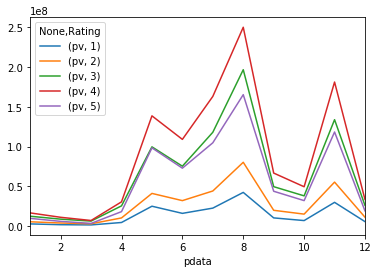

In [11]:
df_stack.plot()

In [12]:
# unstack和stack是互逆操作
df_stack.stack().head(20)

pv
pdata Rating          
1     1        2613452
      2        5294359
      3       12273331
      4       16452340
      5        9580889
2     1        1608795
      2        3747792
      3        8608216
      4       10941690
      5        5819374
3     1        1344378
      2        2772172
      3        6156512
      4        6911661
      5        3228406
4     1        4397883
      2       10147641
      3       25330546
      4       30406281
      5       18070625

In [13]:
# 3. 使用pivot简化透视
df_group.head(20)

pv
pdata Rating          
1     1        2613452
      2        5294359
      3       12273331
      4       16452340
      5        9580889
2     1        1608795
      2        3747792
      3        8608216
      4       10941690
      5        5819374
3     1        1344378
      2        2772172
      3        6156512
      4        6911661
      5        3228406
4     1        4397883
      2       10147641
      3       25330546
      4       30406281
      5       18070625

In [14]:
df_reset = df_group.reset_index() # 重置索引，默认的数字索引，月份，评分，次数
df_reset.head()

,pdata,Rating,pv
0,1,1,2613452
1,1,2,5294359
2,1,3,12273331
3,1,4,16452340
4,1,5,9580889


In [18]:
df_pivot = df_reset.pivot('pdata','Rating','pv')
df_pivot.head()

Rating,1,2,3,4,5
pdata,,,,,
1,2613452,5294359,12273331,16452340,9580889
2,1608795,3747792,8608216,10941690,5819374
3,1344378,2772172,6156512,6911661,3228406
4,4397883,10147641,25330546,30406281,18070625
5,24893943,41021601,99671422,138699142,98385825


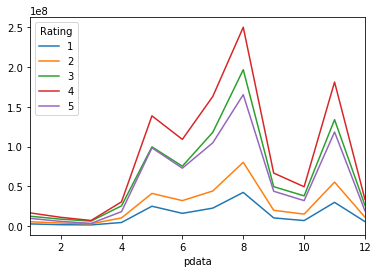

In [19]:
df_pivot.plot()

In [20]:
# pivot方法相当于对df使用set_index创建分层索引，然后调用unstack

In [ ]:
# 4. stack、unstack、pivot的语法
# stack:DataFrame.stack(level=-1,dropna=True),将column变成index，类似把横放的书籍变成竖放
# level=-1代表多层索引的最内层，可以通过==0,1,2指定多层索引的对应层
# unstack:DataFrame.unstack(level=-1,fill_value=None),将index变成column，类似把竖放的书籍变成横放
# pivot：DataFrame.pivot(index=None,columns=None,value=None),指定index，columns，values实现二维透视
